#📌 Extracão

In [5]:
import pandas as pd

# Lendo o JSON que você subiu para o Colab
df = pd.read_json("TelecomX_Data.json")

print("✅ Dados carregados com sucesso! Linhas x Colunas:", df.shape)
df.head()


✅ Dados carregados com sucesso! Linhas x Colunas: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [8]:
import unicodedata

# Padronização dos nomes das colunas
def normalizar_nome(col):
    col = "".join(c for c in unicodedata.normalize("NFKD", col) if not unicodedata.combining(c))
    col = col.strip().lower()
    for ch in [" ", "-", "/", "\\", ".", ",", "(", ")", "%", "º", "ª", ":"]:
        col = col.replace(ch, "_")
    col = "_".join([c for c in col.split("_") if c])
    return col

df.columns = [normalizar_nome(c) for c in df.columns]

# Converter colunas complexas (dict, list) em string
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict, list))).any():
        df[col] = df[col].astype(str)

# Agora sim remover duplicados
df = df.drop_duplicates().reset_index(drop=True)

# Converter colunas numéricas principais
for col in ["charges_monthly", "charges_total", "tenure"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Criar coluna contas_diarias
if "charges_monthly" in df.columns:
    df["contas_diarias"] = df["charges_monthly"] / 30

print("✅ Transformação concluída!")
df.head()



✅ Transformação concluída!


,customerid,churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#📊 Carga e análise

📊 Estatísticas descritivas:


,count,unique,top,freq
customerid,7267,7267,9995-HOTOH,1
churn,7267,3,No,5174
customer,7267,891,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",223
phone,7267,3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}",3495
internet,7267,129,"{'InternetService': 'No', 'OnlineSecurity': 'N...",1581
account,7267,6931,"{'Contract': 'Month-to-month', 'PaperlessBilli...",6


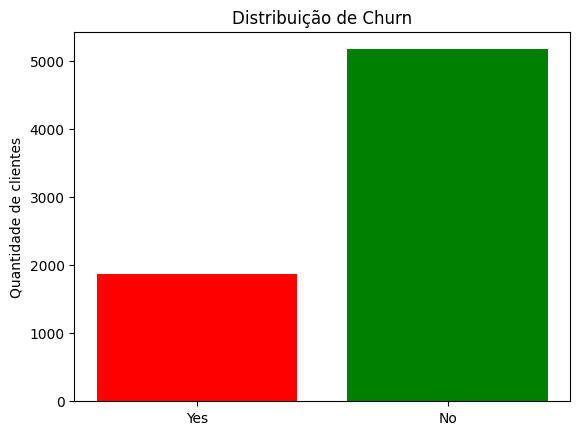

In [9]:
import matplotlib.pyplot as plt

# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
display(df.describe(include="all").T)

# Distribuição de Churn
if "churn" in df.columns:
    churn_counts = df["churn"].value_counts().reindex(["Yes", "No"]).fillna(0)
    plt.bar(churn_counts.index, churn_counts.values, color=["red","green"])
    plt.title("Distribuição de Churn")
    plt.ylabel("Quantidade de clientes")
    plt.show()

# Churn por tipo de contrato (se existir)
if "contract" in df.columns and "churn" in df.columns:
    churn_contract = pd.crosstab(df["contract"], df["churn"], normalize="index")*100
    churn_contract.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title("Churn (%) por Tipo de Contrato")
    plt.ylabel("% dentro do contrato")
    plt.show()

# Boxplot Mensalidade vs Churn (se existir)
if "charges_monthly" in df.columns and "churn" in df.columns:
    churn_map = {"Yes":"Churn", "No":"Não churn"}
    grupos = [df.loc[df["churn"]=="Yes","charges_monthly"].dropna(),
              df.loc[df["churn"]=="No","charges_monthly"].dropna()]
    plt.boxplot(grupos, labels=["Churn","Não churn"], showmeans=True)
    plt.title("Mensalidade vs Churn")
    plt.ylabel("Charges_Monthly")
    plt.show()


#📄Relatorio Final

# Relatório Final – Análise de Churn (Telecom X)

Nesta análise busquei entender os principais fatores que levam clientes a cancelar os serviços da Telecom X.  

Depois de organizar os dados, percebi alguns pontos importantes:

- **Contratos mensais** concentram a maior parte dos cancelamentos, enquanto contratos de longo prazo apresentam taxas bem menores.  
- **Clientes recentes (tenure baixo)** têm maior risco de churn, mostrando que os primeiros meses são decisivos.  
- **Mensalidades mais altas** também aparecem ligadas a um número maior de cancelamentos.  
- Métodos de pagamento mais automáticos, como débito em conta, parecem ajudar na retenção.  

### Conclusão
O churn está mais associado a clientes novos, com contratos mensais e planos caros.  
Uma estratégia que pode ajudar é incentivar contratos de maior duração, oferecer descontos para novos clientes e trabalhar melhor o relacionamento logo nos primeiros meses.  
